# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2025/)    
## 1MS041, 2025 
&copy;2025 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [1]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [4]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [14]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [10]:
Y_obs = [y for x,y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [18]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(y <= x[0]) and (z <= x[1])] for y,z in zip (Y_obs,Z_obs)])

y<= a and z<=b returns true and then mean is just sum of (1,0,1,0,0,) / total observations aka probability

In [20]:
F_X_12([1,0])

np.float64(0.9551328068916008)

This is the JDF for this problem

In [27]:
print("\tz <= 0 \t\tz <= 1")
for x1 in range(0,2):
    print("y <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

	z <= 0 		z <= 1
y <= 0 	0.86		0.87		

y <= 1 	0.96		1.00		



In [23]:
F_X_12((1,0))

np.float64(0.9551328068916008)

In [33]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

np.False_

In [34]:
F_X_12((0,1))*F_X_12((1,0))

np.float64(0.8270846721557743)

In [35]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [36]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

np.float64(0.812)

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [37]:
# Or we can just compute it directly
np.mean(Y_obs)

np.float64(0.13406317300789664)

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

In [40]:
x = np.random.normal(size=100)

In [41]:
np.mean(x)

np.float64(0.2129070484216638)

In [42]:
g = lambda x: x**2

In [43]:
mean = np.mean(x)
y = x-mean
np.mean(y**4)

np.float64(2.3909231767563712)

## Moments etc

In [44]:
import numpy as np
x = np.random.normal(size=100)

In [45]:
x

array([-6.39054274e-01, -5.47061341e-01, -7.56292252e-01,  9.17265026e-01,
       -9.73889111e-01, -1.39447567e+00,  7.41444248e-01,  1.37302417e+00,
       -1.76143302e-01,  8.10400740e-01, -1.08928196e+00, -5.53165293e-01,
       -3.82818158e-01, -1.65816572e+00, -1.10783596e+00, -1.04583860e+00,
       -2.42158917e+00, -5.76852801e-01,  3.76977113e-01,  1.09872531e-01,
       -1.86410631e-03, -5.58983372e-01,  8.52729271e-01,  2.97667114e-01,
        1.44504682e+00,  3.76814886e-01, -1.25481763e-01, -1.13352288e+00,
        1.24160274e+00,  1.94084182e+00, -1.97297284e+00, -1.67966789e+00,
        8.17335263e-02,  4.69259372e-01, -3.94228618e-01, -9.07072939e-01,
        1.67145091e+00,  2.14115146e-01, -1.50854665e+00, -7.16354690e-01,
       -1.76990496e+00, -7.78263136e-01,  2.55540743e-01, -2.45245212e+00,
       -1.49067622e+00,  7.45277938e-01,  4.08426163e-01,  2.29014148e+00,
        6.45357622e-01,  2.43745881e-01, -8.71474302e-01, -1.50610935e+00,
       -1.59773101e+00, -

## Sample mean

In [46]:
np.mean(x)

np.float64(-0.13209872314110627)

## Sample variance

In [47]:
np.var(x)

np.float64(1.1870597494707824)

Or by doing it yourself

In [48]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

np.float64(1.1870597494707824)

Higher moments, we can use `scipy`

In [49]:
from scipy.stats import skew, kurtosis

In [50]:
skew(x)

np.float64(0.07362800218741176)

In [51]:
kurtosis(x,fisher=False)

np.float64(2.5487784709246957)

## Moments and tail behavior

In [11]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

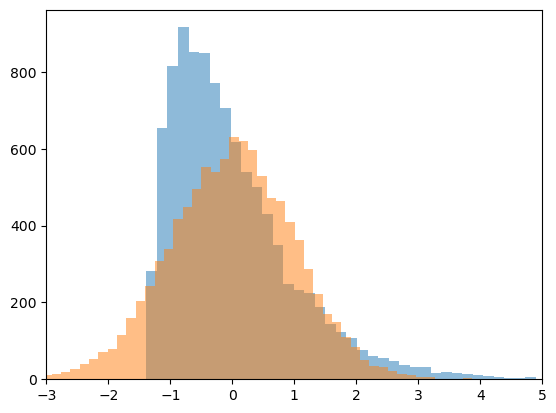

In [12]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [61]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [62]:
print_basic_stats(standardize(normal))

mean: 0.00	std: 1.00	skew: 0.04	kurtosis: 2.98


In [63]:
print_basic_stats(standardize(chi2))

mean: 0.00	std: 1.00	skew: 1.36	kurtosis: 5.62


In [64]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: -0.00	std: 1.00	skew: 0.40	kurtosis: 2.98


In [65]:
np.mean(np.power(standardize(chi2),3)) # Skewness

np.float64(1.3613237061416814)

In [66]:
np.mean(np.power(standardize(chi2),4)) # kurtosis

np.float64(5.61696201922514)

## Transformations of random variables

Consider a Binomial random variable

In [13]:
n = 10
p = 0.5
x = np.random.binomial(n,p,size=1000)

Lets plot the empirical density

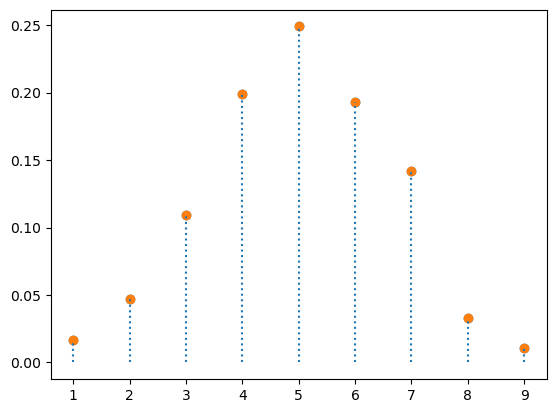

In [14]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

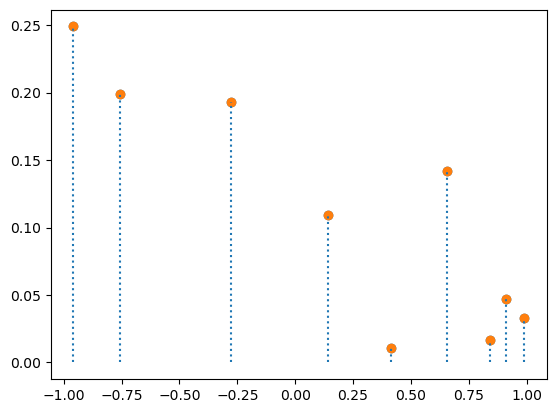

In [15]:
plotEMF(makeEMF(np.sin(x)))

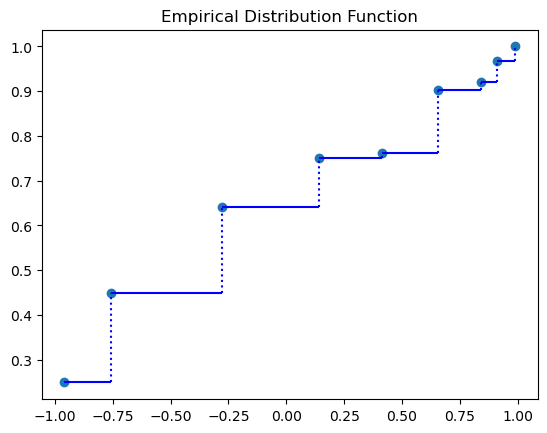

In [16]:
plotEDF(makeEDF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [18]:
Y_space = np.sort(np.sin(np.arange(0,11)))
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

array([-0.95892427, -0.7568025 , -0.54402111, -0.2794155 ,  0.        ,
        0.14112001,  0.41211849,  0.6569866 ,  0.84147098,  0.90929743,
        0.98935825])

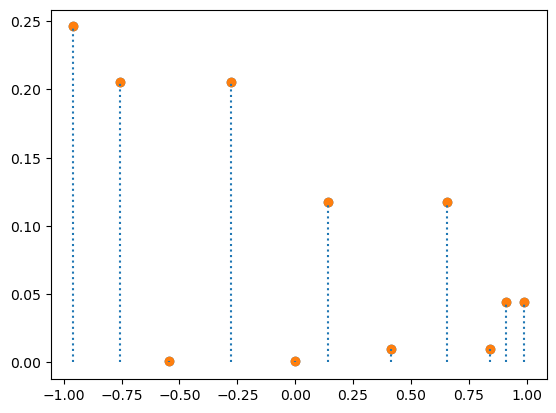

In [79]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

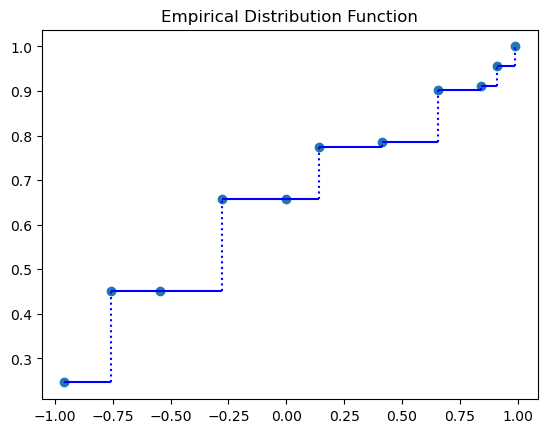

In [80]:
from Utils import emfToEdf
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))